Justin Kiggins

Oct 24, 2016

[justink@alleninstitute.org](mailto:justink@alleninstitute.org)

Summary of learning on cohorts 1-3 on the Detection of Change task.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

# import sys
# sys.path.append(r'C:\Users\justink\Code\dro')

from dro import utilities as dro
from dro import plotting_functions as dro_plots

/home/justink/.conda/envs/braintv_behav/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


failed to import CV2 in core.utilities
failed to import mask in core.jcamdata.py
failed to import get_mask_dict_gui in core.epoch.py
failed to import aibs.Analysis.Core.smooth
failed to import mask relalated functions in __init__.py


/home/justink/.conda/envs/braintv_behav/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
from braintv_behav.cohorts import cohort_assignment
cohort_assignment

,mouse,experiment,cohort,day_zero,mtrain_status
0,M272464,visual_behavior_development,4,2016-10-31,NaN
1,M271733,visual_behavior_development,4,2016-10-31,NaN
2,M271728,visual_behavior_development,4,2016-10-31,NaN
3,M276951,visual_behavior_development,4,2016-10-31,NaN
4,M276950,visual_behavior_development,4,2016-10-31,NaN
5,M276600,visual_behavior_development,4,2016-10-31,NaN
6,M272465,visual_behavior_development,3,2016-10-10,NaN
7,M265158,visual_behavior_development,3,2016-10-10,NaN
8,M271966,visual_behavior_development,3,2016-10-10,NaN
9,M265154,visual_behavior_development,3,2016-10-10,NaN


In [3]:
from braintv_behav import latest

In [4]:
latest.local_dir

'/local1/Projects/braintv_behavior_piloting/braintv_behav/../data/raw'

In [5]:
from braintv_behav.cohorts import mouse_info
mouse_df = cohort_assignment['mouse'].apply(lambda mouse: pd.Series(mouse_info(mouse)))
cohort_assignment = cohort_assignment.merge(
    mouse_df,
    how='left',
    left_on='mouse',
    right_on='mouse_id'
)

In [6]:
cohort_assignment.head()

,mouse,experiment,cohort,day_zero,mtrain_status,baselineweight,birthdate,dayonescript,driver1,driver2,...,minweight,mouse_id,mousenotes,owner,reporter,sex,tasktype,training_location,userid,waterrestrictionstartdate
0,M272464,visual_behavior_development,4,2016-10-31,NaN,20.2,2016-08-24,,None,None,...,85,M272464,Additional information...,sissyc,None,Male,None,None,sissyc,2016-10-21
1,M271733,visual_behavior_development,4,2016-10-31,NaN,20.4,2016-08-01,,None,None,...,85,M271733,Additional information...,sissyc,None,Female,None,None,sissyc,2016-10-21
2,M271728,visual_behavior_development,4,2016-10-31,NaN,23.0,2016-08-01,,None,None,...,85,M271728,Additional information...,sissyc,None,Male,None,None,sissyc,2016-10-21
3,M276951,visual_behavior_development,4,2016-10-31,NaN,20.8,2016-08-27,,None,None,...,81,M276951,Additional information...,sissyc,None,Female,None,None,sissyc,2016-10-21
4,M276950,visual_behavior_development,4,2016-10-31,NaN,20.4,2016-08-27,,None,None,...,85,M276950,Additional information...,sissyc,None,Female,None,None,sissyc,2016-10-21


## Load data

In [7]:
cohort_assignment.groupby('cohort')['group'].value_counts()

cohort  group                                
1       Scnn1a-Tg3-Cre; Camk2a-tTa; Ai93 (NC)    3
        Rorb-IRES2-Cre; Camk2a-tTA; Ai93 (NC)    2
        Sim1-Cre                                 1
2       Rasgrf                                   2
        Ai93                                     1
        Gnb4                                     1
        Rasgrf2                                  1
        Sim1-Cre                                 1
3       Rorb-IRES2-Cre; Camk2a-tTA; Ai93 (NC)    3
        EMX-Cre-Ai35                             2
        Scnn1a-Tg3-Cre; Camk2a-tTa; Ai93 (NC)    1
4       EMX-Cre-Ai35                             3
        Nr5a1                                    2
        Emx-IRES-Cre;Ai95(NC)                    1
5       Cux2-CreERT2                             1
        Cux2-CreERT2; Camk2a-tTA;Ai93            1
        EmX-IRES-Cre                             1
        Nr5a1                                    1
        Nr5a1-Cre                   

In [8]:
from braintv_behav import latest
latest.copy_latest()

copying 170215141116-task=DoC_NaturalImages_CAMMatched_TestImages_n=8_stage=Testing_mouse=M272464.pkl
copying 170215141244-task=DoC_NaturalImages_CAMMatched_TestImages_n=8_stage=Testing_mouse=M271728.pkl
copying 170215144438-task=DoC_NaturalImages_CAMMatched_TestImages_n=8_stage=Testing_mouse=M276951.pkl
copying 170215141421-task=DoC_NaturalImages_CAMMatched_TestImages_n=8_stage=Testing_mouse=M258173.pkl
copying 170215141251-task=DoC_NaturalImages_CAMMatched_TestImages_n=8_stage=Testing_mouse=M258089.pkl
copying 170215141417-task=DoC_NaturalImages_CAMMatched_TestImages_n=8_stage=Testing_mouse=M258274.pkl
copying 170215152323-task=DetectionOfChange_General_stage=static_full_field_gratings_mouse=M278460.pkl
copying 170215152206-task=DetectionOfChange_General_stage=static_full_field_gratings_mouse=M276953.pkl
copying 170215152030-task=DetectionOfChange_General_stage=static_full_field_gratings_mouse=M274438.pkl
copying 170215152529-task=DetectionOfChange_General_stage=static_full_field_gra

In [9]:
from braintv_behav.latest import local_dir
trials = dro.load_from_folder(local_dir)

error loading file 161107125855-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M276600.pkl: 
Loading /local1/Projects/braintv_behavior_piloting/braintv_behav/../data/raw/170215144438-task=DoC_NaturalImages_CAMMatched_TestImages_n=8_stage=Testing_mouse=M276951.pkl


/home/justink/Code/dro/dro/utilities.py:157: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 2 but corresponding boolean dimension is 1
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals[:len(lick_times_on_this_trial)]>1]))
/home/justink/Code/dro/dro/utilities.py:157: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 9 but corresponding boolean dimension is 8
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals[:len(lick_times_on_this_trial)]>1]))
/home/justink/Code/dro/dro/utilities.py:157: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 7 but corresponding boolean dimension is 6
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals[:len(lick_times_on_this_trial)]>1]))


Loading /local1/Projects/braintv_behavior_piloting/braintv_behav/../data/raw/170215152327-task=DetectionOfChange_General_stage=static_full_field_gratings_mouse=M294753.pkl


/home/justink/Code/dro/dro/utilities.py:157: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 6 but corresponding boolean dimension is 5
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals[:len(lick_times_on_this_trial)]>1]))
/home/justink/Code/dro/dro/utilities.py:157: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 4 but corresponding boolean dimension is 3
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals[:len(lick_times_on_this_trial)]>1]))
/home/justink/Code/dro/dro/utilities.py:157: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 8 but corresponding boolean dimension is 7
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals[:len(lick_times_on_this_trial)]>1]))


Loading /local1/Projects/braintv_behavior_piloting/braintv_behav/../data/raw/170215141251-task=DoC_NaturalImages_CAMMatched_TestImages_n=8_stage=Testing_mouse=M258089.pkl


/home/justink/Code/dro/dro/utilities.py:157: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 11 but corresponding boolean dimension is 10
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals[:len(lick_times_on_this_trial)]>1]))
/home/justink/Code/dro/dro/utilities.py:157: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 12 but corresponding boolean dimension is 11
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals[:len(lick_times_on_this_trial)]>1]))


Loading /local1/Projects/braintv_behavior_piloting/braintv_behav/../data/raw/170215152323-task=DetectionOfChange_General_stage=static_full_field_gratings_mouse=M278460.pkl


/home/justink/Code/dro/dro/utilities.py:157: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 5 but corresponding boolean dimension is 4
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals[:len(lick_times_on_this_trial)]>1]))
/home/justink/Code/dro/dro/utilities.py:157: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 3 but corresponding boolean dimension is 2
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals[:len(lick_times_on_this_trial)]>1]))


error loading file .161107103018-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M261584.pkl.CtyC9d: 
Loading /local1/Projects/braintv_behavior_piloting/braintv_behav/../data/raw/170215141244-task=DoC_NaturalImages_CAMMatched_TestImages_n=8_stage=Testing_mouse=M271728.pkl


/home/justink/Code/dro/dro/utilities.py:157: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 14 but corresponding boolean dimension is 13
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals[:len(lick_times_on_this_trial)]>1]))


Loading /local1/Projects/braintv_behavior_piloting/braintv_behav/../data/raw/170215152106-task=DetectionOfChange_General_stage=static_full_field_gratings_mouse=M294759.pkl


/home/justink/Code/dro/dro/utilities.py:157: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 13 but corresponding boolean dimension is 12
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals[:len(lick_times_on_this_trial)]>1]))
/home/justink/Code/dro/dro/utilities.py:157: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 27 but corresponding boolean dimension is 26
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals[:len(lick_times_on_this_trial)]>1]))
/home/justink/Code/dro/dro/utilities.py:157: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 10 but corresponding boolean dimension is 9
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals[:len(lick_times_on_this_trial)]>1]))
/home/justink/Code/dro/dro/utilities.py:157: VisibleDeprecationWarning: boolean index did not match indexed array al

Loading /local1/Projects/braintv_behavior_piloting/braintv_behav/../data/raw/170215152206-task=DetectionOfChange_General_stage=static_full_field_gratings_mouse=M276953.pkl
Loading /local1/Projects/braintv_behavior_piloting/braintv_behav/../data/raw/170215141421-task=DoC_NaturalImages_CAMMatched_TestImages_n=8_stage=Testing_mouse=M258173.pkl
Loading /local1/Projects/braintv_behavior_piloting/braintv_behav/../data/raw/170215141116-task=DoC_NaturalImages_CAMMatched_TestImages_n=8_stage=Testing_mouse=M272464.pkl


/home/justink/Code/dro/dro/utilities.py:157: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 20 but corresponding boolean dimension is 19
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals[:len(lick_times_on_this_trial)]>1]))


Loading /local1/Projects/braintv_behavior_piloting/braintv_behav/../data/raw/170215152030-task=DetectionOfChange_General_stage=static_full_field_gratings_mouse=M274438.pkl
Loading /local1/Projects/braintv_behavior_piloting/braintv_behav/../data/raw/170215141417-task=DoC_NaturalImages_CAMMatched_TestImages_n=8_stage=Testing_mouse=M258274.pkl


/home/justink/Code/dro/dro/utilities.py:157: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 140 but corresponding boolean dimension is 139
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals[:len(lick_times_on_this_trial)]>1]))
/home/justink/Code/dro/dro/utilities.py:157: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 24 but corresponding boolean dimension is 23
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals[:len(lick_times_on_this_trial)]>1]))


Loading /local1/Projects/braintv_behavior_piloting/braintv_behav/../data/raw/170215152529-task=DetectionOfChange_General_stage=static_full_field_gratings_mouse=M274439.pkl


/home/justink/Code/dro/dro/utilities.py:157: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 15 but corresponding boolean dimension is 14
  lt.append(list(np.array(lick_times_on_this_trial)[lick_intervals[:len(lick_times_on_this_trial)]>1]))


In [10]:
trials = trials.merge(
    cohort_assignment,
    how='left',
    on='mouse_id',
)

In [11]:
day_zero = {r['mouse']:"{:%Y-%m-%d}".format(r['day_zero']) for _,r in cohort_assignment.iterrows()}

In [12]:
day_zero

{u'M246782': '2016-08-22',
 u'M249123': '2016-08-22',
 u'M250783': '2016-08-22',
 u'M250786': '2016-08-22',
 u'M258089': '2016-09-19',
 u'M258173': '2016-09-19',
 u'M258174': '2016-08-22',
 u'M258194': '2016-10-10',
 u'M258196': '2016-08-22',
 u'M258274': '2016-09-19',
 u'M258275': '2016-09-19',
 u'M258276': '2016-09-19',
 u'M261584': '2016-09-19',
 u'M265154': '2016-10-10',
 u'M265158': '2016-10-10',
 u'M265166': '2016-10-10',
 u'M271728': '2016-10-31',
 u'M271733': '2016-10-31',
 u'M271966': '2016-10-10',
 u'M272464': '2016-10-31',
 u'M272465': '2016-10-10',
 u'M273577': '2016-11-28',
 u'M273578': '2016-11-28',
 u'M274438': '2017-02-13',
 u'M274439': '2017-02-13',
 u'M275962': '2016-11-28',
 u'M275963': '2017-01-16',
 u'M275965': '2017-01-16',
 u'M276444': '2016-11-28',
 u'M276445': '2016-11-28',
 u'M276600': '2016-10-31',
 u'M276950': '2016-10-31',
 u'M276951': '2016-10-31',
 u'M276953': '2017-02-13',
 u'M277931': '2017-01-16',
 u'M278229': '2016-11-28',
 u'M278329': '2017-01-16',
 

In [13]:

def get_training_day(df_in):
    '''adds a column to the dataframe with the number of unique training days up to that point
         '''
    coh = cohort_assignment.set_index('mouse')['cohort']
#     print coh

    training_day_lookup = {}
    for mouse, group in df_in.groupby('mouse_id'):
        dates = np.sort(group['date'].unique())
        try:
            dz = day_zero[mouse]
            offset = np.argwhere(dates==dz)[0][0]
        except KeyError:
            print 'day zero not found for {}'.format(mouse)
            offset = 0
        except IndexError:
            print 'day zero ({}) not found in dates'.format(dz)
            offset = 0
        print offset
        training_day_lookup[mouse] = {date:training_day-offset for training_day,date in enumerate(dates)}
        print mouse,dates
    return df_in.apply(lambda row: training_day_lookup[row['mouse_id']][row['date']],axis=1)

trials['training_day'] = get_training_day(trials)

#df['day_of_week'] = df.startdatetime.dt.weekday_name

## build arrays for change detection

# df['change'] = ~df['change_frame'].isnull()
trials['change'] = trials['trial_type']=='go'
trials['detect'] = trials['response']==1.0

## calculate reaction times

trials['reaction_time'] = trials['lick_times'].map(lambda x: x[0] if len(x)>0 else np.nan)
trials['reaction_time'] = trials.apply(lambda row: row['reaction_time'] - row['change_time'],axis=1)

## unwrap the response window
trials['response_window_lower'] = trials['response_window'].map(lambda x: x[0])
trials['response_window_upper'] = trials['response_window'].map(lambda x: x[1])


0
M246782 ['2016-08-22' '2016-08-23' '2016-08-24' '2016-08-25' '2016-08-26'
 '2016-08-29' '2016-08-30' '2016-08-31' '2016-09-02' '2016-09-06'
 '2016-09-07' '2016-09-08' '2016-09-09' '2016-09-12' '2016-09-13'
 '2016-09-14' '2016-09-15' '2016-09-16' '2016-09-19' '2016-09-20']
0
M249123 ['2016-08-22' '2016-08-23' '2016-08-24' '2016-08-25' '2016-08-26'
 '2016-08-29' '2016-08-30' '2016-08-31' '2016-09-02' '2016-09-06'
 '2016-09-07' '2016-09-08' '2016-09-09' '2016-09-12' '2016-09-13'
 '2016-09-15' '2016-09-16' '2016-09-19' '2016-09-20']
0
M250783 ['2016-08-22' '2016-08-23' '2016-08-24' '2016-08-25' '2016-08-26'
 '2016-08-29' '2016-08-30' '2016-08-31' '2016-09-02' '2016-09-06'
 '2016-09-07' '2016-09-08' '2016-09-09' '2016-09-12' '2016-09-13'
 '2016-09-14' '2016-09-15' '2016-09-16' '2016-09-19' '2016-09-20'
 '2016-09-21' '2016-09-22' '2016-09-23' '2016-09-26' '2016-09-27'
 '2016-09-28' '2016-09-29' '2016-09-30' '2016-10-03' '2016-10-05'
 '2016-10-06' '2016-10-07' '2016-10-10' '2016-10-11' '201

In [14]:
from braintv_behav import metrics
from sklearn.metrics import accuracy_score

In [15]:
def compute_metrics(group):
    result = {
        'accuracy': metrics.discrim(group,'change','detect',metric=accuracy_score),
        'd-prime': metrics.discrim(group,'change','detect',metric=metrics.d_prime),
        'd-prime_peak': metrics.peak_dprime(group),
        'discrim_p': metrics.discrim(group,'change','detect',metric=metrics.discrim_p),
        'response_bias': metrics.response_bias(group,'detect'),
        'earned_water': metrics.earned_water(group), 
        'total_water': metrics.total_water(group), 
        'num_trials': metrics.num_trials(group),
        'num_contingent_trials': metrics.num_contingent_trials(group),
        'reaction_time_50th%ile': metrics.reaction_times(group,percentile=50),
        'reaction_time_05th%ile': metrics.reaction_times(group,percentile=5),
        'reaction_time_95th%ile': metrics.reaction_times(group,percentile=95),
    }
    
    return pd.Series(result, name='metrics')

water = trials.groupby(['cohort','mouse_id','training_day']).apply(compute_metrics).reset_index()
water['frac_earned_water'] = water['earned_water'] / water['total_water']
water['reaction_time_spread'] = water['reaction_time_95th%ile'] - water['reaction_time_05th%ile']
water.head()

/local1/Projects/braintv_behavior_piloting/braintv_behav/metrics.py:16: RuntimeWarning: invalid value encountered in double_scalars
  FAR = fp / (tn + fp)
/home/justink/.conda/envs/braintv_behav/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1897: RuntimeWarning: invalid value encountered in greater
  cond1 = (0 < q) & (q < 1)
/home/justink/.conda/envs/braintv_behav/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1897: RuntimeWarning: invalid value encountered in less
  cond1 = (0 < q) & (q < 1)
/home/justink/.conda/envs/braintv_behav/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:343: RuntimeWarning: All-NaN slice encountered
  warnings.warn("All-NaN slice encountered", RuntimeWarning)
/local1/Projects/braintv_behavior_piloting/braintv_behav/metrics.py:91: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return behav_df[mask][(behav_df['reward_times'].map(len)>0)]['reward_volume'].sum()


metrics,cohort,mouse_id,training_day,accuracy,d-prime,d-prime_peak,discrim_p,earned_water,num_contingent_trials,num_trials,reaction_time_05th%ile,reaction_time_50th%ile,reaction_time_95th%ile,response_bias,total_water,frac_earned_water,reaction_time_spread
0,1.0,M246782,0,0.544872,NaN,NaN,1.000000,1.092,156.0,157.0,-5.020008,0.334217,3.778943,0.544872,1.092,1.0,8.798951
1,1.0,M246782,1,0.219101,-0.057545,0.256948,0.946458,0.354,356.0,1563.0,0.161557,1.286406,4.141207,0.171348,0.354,1.0,3.979650
2,1.0,M246782,2,0.264957,-0.803594,-0.346402,0.076643,0.198,117.0,394.0,0.208261,1.360493,5.292036,0.273504,0.198,1.0,5.083775
3,1.0,M246782,3,0.241935,-0.025337,0.589474,0.783441,0.276,186.0,426.0,0.087997,1.401724,4.474582,0.193548,0.276,1.0,4.386585
4,1.0,M246782,4,0.312849,-0.262469,-0.032233,0.681377,0.530,179.0,423.0,0.150696,1.343656,4.549200,0.296089,0.530,1.0,4.398504


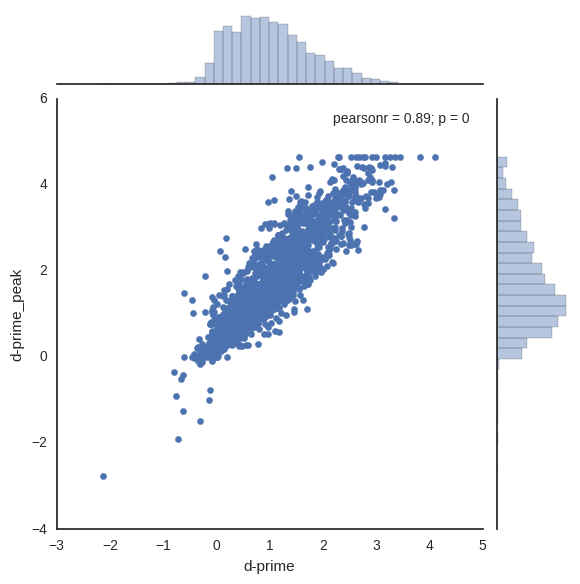

In [16]:
sns.jointplot('d-prime','d-prime_peak',data=water)

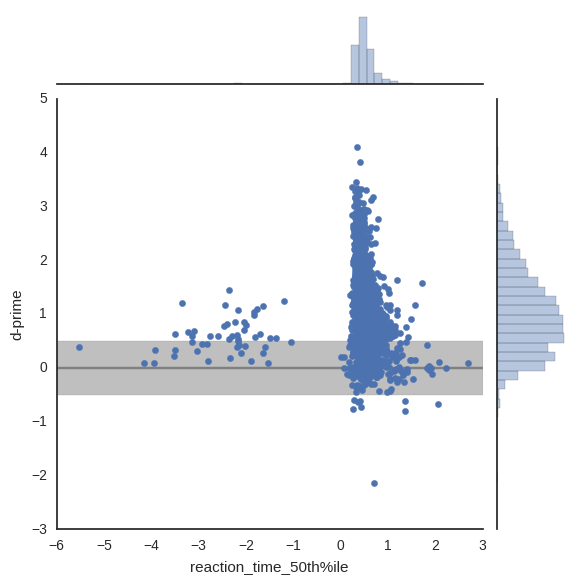

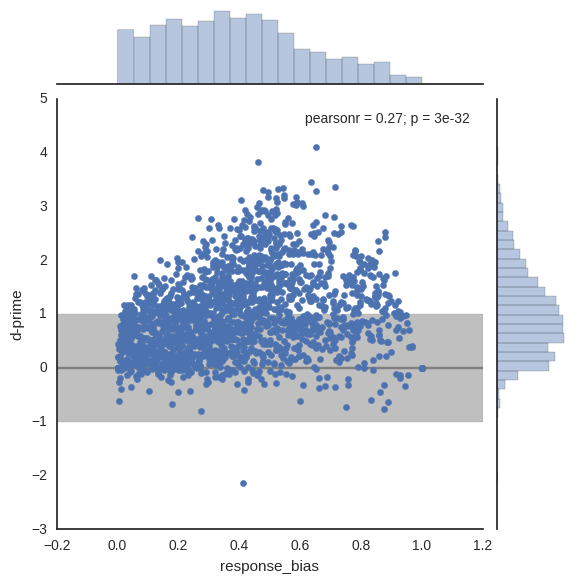

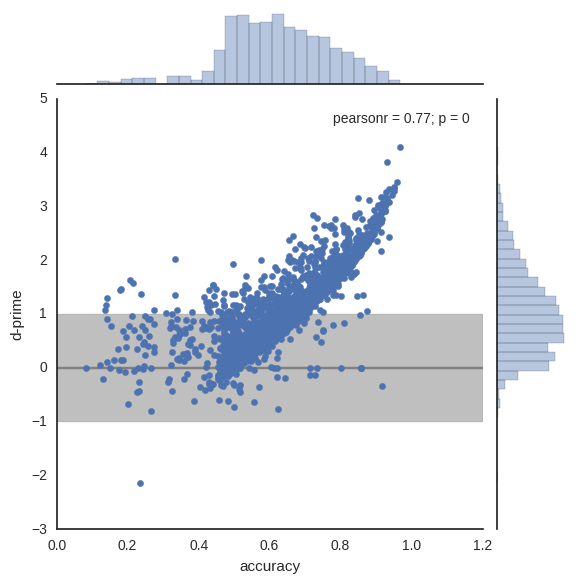

In [17]:
jp = sns.jointplot('reaction_time_50th%ile','d-prime',data=water,
                   stat_func=None,
             )
jp.ax_joint.axhspan(-0.5,0.5,color='0.5',alpha=0.5,zorder=-2)
jp.ax_joint.axhline(0.0,color='0.5',zorder=-1)

plt.savefig('../figures/d_prime_by_reaction_time.pdf')

jp = sns.jointplot('response_bias','d-prime',data=water,
             )
jp.ax_joint.axhspan(-1,1,color='0.5',alpha=0.5,zorder=-2)
jp.ax_joint.axhline(0.0,color='0.5',zorder=-1)


jp = sns.jointplot('accuracy','d-prime',data=water,
             )
jp.ax_joint.axhspan(-1,1,color='0.5',alpha=0.5,zorder=-2)
jp.ax_joint.axhline(0.0,color='0.5',zorder=-1)

In [18]:
def stars(p,ns='n.s.',thresh=(0.1,0.05,0.01,0.001)):
    '''Converts p-values into R-styled stars.
    Signif. codes:
        '***' :  < 0.001
        '**' : < 0.01
        '*' : < 0.05
        '.' : < 0.1
        'n.s.' : < 1.0
    '''
    lookup = (
        (0.001, '***'),
        (0.01, '**'),
        (0.05, '*'),
        (0.1, '.'),
    )
    for t,s in lookup:
        if (t in thresh) and (p < t):
            return s
    return ns

def plot_stars(p,x,y,ax,ns='n.s.',thresh=(0.1,0.05,0.01,0.001),size='large',horizontalalignment='center',**kwargs):
    ''' Plots significance stars '''
    ax.text(x,y,stars(p,ns,thresh),size=size,horizontalalignment=horizontalalignment,**kwargs)

def plot_linestar(p,x1,x2,y,ax):
    ax.hlines(y, x1, x2)
    plot_stars(0.5*(x1+x2),y+0.02,stars(p),ax=ax,size='large',horizontalalignment='center')

In [19]:
class RisingEdge():
    """
    This object implements a "rising edge" detector on a boolean array.
    
    It takes advantage of how pandas applies functions in order.
    
    For example, if the "criteria" column in the `df` dataframe consists of booleans indicating
    whether the row meets a criterion, we can detect the first run of three rows above criterion
    with the following
    
        first_run_of_three = (
            df['criteria']
            .rolling(center=False,window=3)
            .apply(func=RisingEdge().check)
            )
    
    ```
    
    """
    def __init__(self):
        self.firstall = False
    def check(self,arr):
        if arr.all():
            self.firstall = True
        return self.firstall

In [20]:
class RisingEdgeTwo():
    """
    This object implements a "rising edge" detector on a boolean array.
    
    It takes advantage of how pandas applies functions in order.
    
    For example, if the "criteria" column in the `df` dataframe consists of booleans indicating
    whether the row meets a criterion, we can detect the first run of three rows above criterion
    with the following
    
        first_run_of_three = (
            df['criteria']
            .rolling(center=False,window=3)
            .apply(func=RisingEdge().check)
            )
    
    ```
    
    """
    def __init__(self):
        self.firstall = False
    def check(self,arr):
        if arr.sum()>1:
            self.firstall = True
        return self.firstall

In [21]:
pdf = water
pdf['d_prime'] = pdf['d-prime']
pdf['d_prime_peak'] = pdf['d-prime_peak']
pdf['stimulus_control'] = pdf['discrim_p'] < 0.01

In [33]:

num_tr_thresh = 20
# dprime_thresh = 0.5


# pdf['criteria'] = (
#     pdf['stimulus_control']
#     & (pdf['num_contingent_trials'] > num_tr_thresh)
#     & (pdf['d_prime'] > dprime_thresh)
# )

pdf['criteria'] = (
#     pdf['stimulus_control']
    (pdf['d_prime_peak'] > 2)
#     & (pdf['num_contingent_trials'] > num_tr_thresh)
)

# mask = pdf.num_trials > num_tr_thresh # ignore sessions with very few trials

first = {}

consecutive_sessions = 3

for key, group in pdf.set_index('training_day').sort_index().groupby(['cohort','mouse_id']):
#     print group.head()
    learned = (
        group['criteria']
        .rolling(center=False,window=consecutive_sessions)
        .apply(func=RisingEdgeTwo().check)
        )
    summary = pd.DataFrame(
        [learned.rename('learned'),
         group['stimulus_control'],
         group['d_prime'],
         group['num_trials'],
        ]).transpose()
    
    try:
        first_session = summary['learned'][summary['learned']==1.0].index[0] #+(1-2)
    except IndexError:
        first_session = np.nan
    
    print key, first_session
#     print summary.tail()
    
    first[key[1]]=first_session
    
def learned(row):
    first_day = first[row['mouse_id']]
    
    if pd.isnull(first_day):
        return False
    else: 
        return (first_day <= row['training_day'])
    
pdf['learned'] = pdf.apply(learned,axis=1)

(1, 'M246782') nan
(1, 'M249123') nan
(1, 'M250783') 13
(1, 'M250786') 9
(1, 'M258174') 6
(1, 'M258196') 9
(2, 'M258089') 12
(2, 'M258173') 33
(2, 'M258274') 8
(2, 'M258275') 21
(2, 'M258276') nan
(2, 'M261584') 13
(3, 'M258194') 7
(3, 'M265154') nan
(3, 'M265158') nan
(3, 'M265166') nan
(3, 'M271966') 12
(3, 'M272465') 23
(4, 'M271728') 5
(4, 'M271733') 11
(4, 'M272464') 8
(4, 'M276600') 6
(4, 'M276950') 17
(4, 'M276951') 6
(5, 'M273577') 4
(5, 'M273578') 12
(5, 'M275962') 12
(5, 'M276444') nan
(5, 'M276445') 8
(5, 'M278229') 4
(6, u'M275963') nan
(6, u'M275965') nan
(6, u'M277931') nan
(6, u'M278329') nan
(6, u'M278332') nan
(6, u'M278463') nan
(7, u'M274438') nan
(7, u'M274439') nan
(7, u'M276953') nan
(7, u'M278460') 2
(7, u'M294753') 2
(7, u'M294759') nan


In [23]:
# trials[trials.cohort=='Cohort 3'].groupby(['mouse_id'])['date'].min()

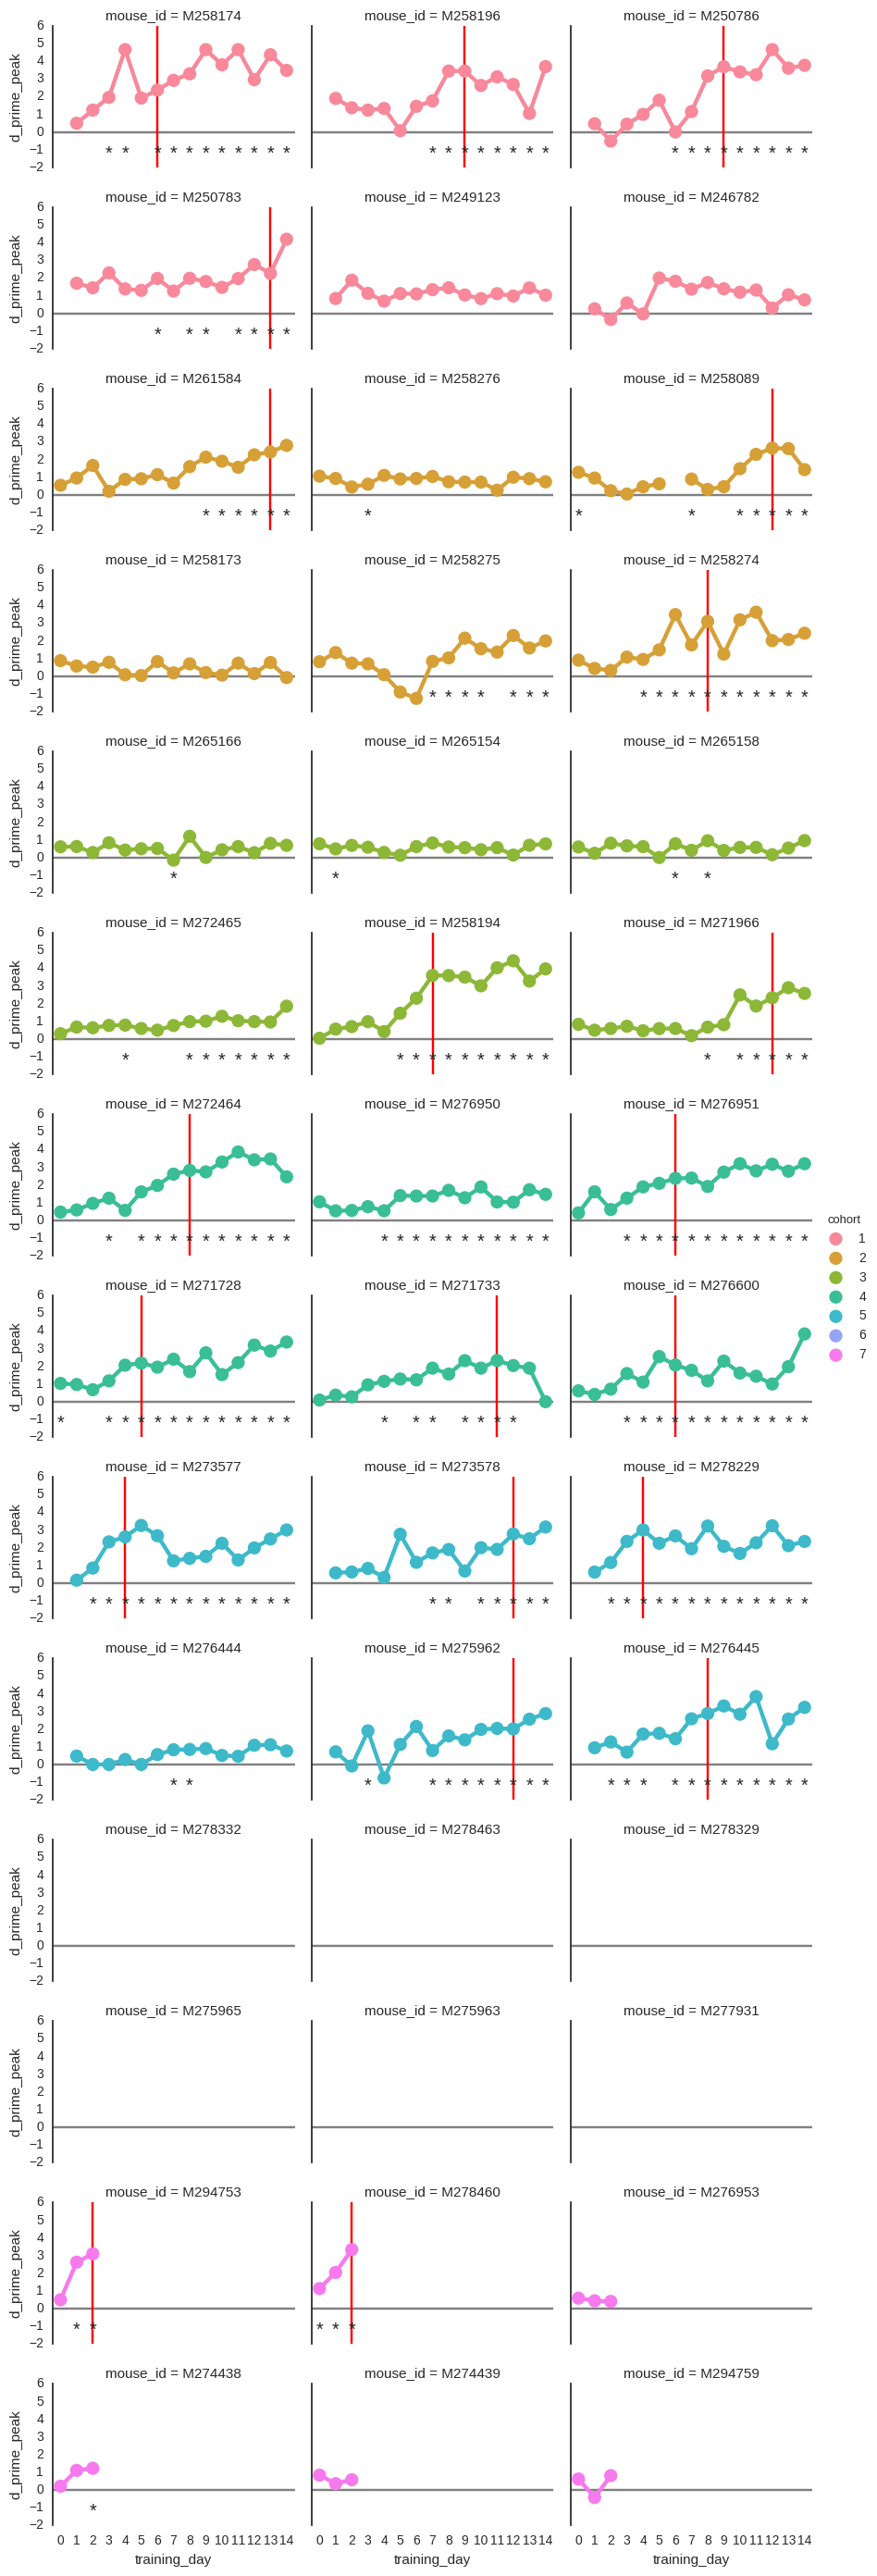

In [34]:
col_order = cohort_assignment.sort_values('cohort')['mouse_id']

mask = (
    (pdf.training_day >= 0)
    & (pdf.training_day < 15)
    )

fp = sns.factorplot('training_day','d_prime_peak',data=pdf[mask],
                    col='mouse_id',
                    col_wrap=3,
                    size=2,
                    aspect=1.5,
                    hue='cohort',
                    col_order=col_order,
              )

yloc = -1.5

for ax,mouse_id in zip(fp.axes.ravel(),col_order):
    ax.axhline(0.0,color='0.5',zorder=-1)
#     ax.axhspan(-dprime_thresh,dprime_thresh,color='0.5',alpha=0.5,zorder=-1)
#     print mouse_id
    for r,row in pdf[mask & (pdf['mouse_id']==mouse_id)].iterrows():
        p, x = row['discrim_p'], row['training_day']
        plot_stars(p,x,yloc,ax,ns='',thresh=(0.05,))
    ax.axvline(first[mouse_id],color='r',zorder=-1)
    
sns.despine(bottom=True)
# plt.xlim(0,8)


plt.savefig('../figures/d_prime_by_training_day_individ.pdf')

In [35]:
pdf['cohort'] = pdf['cohort'].map(int)

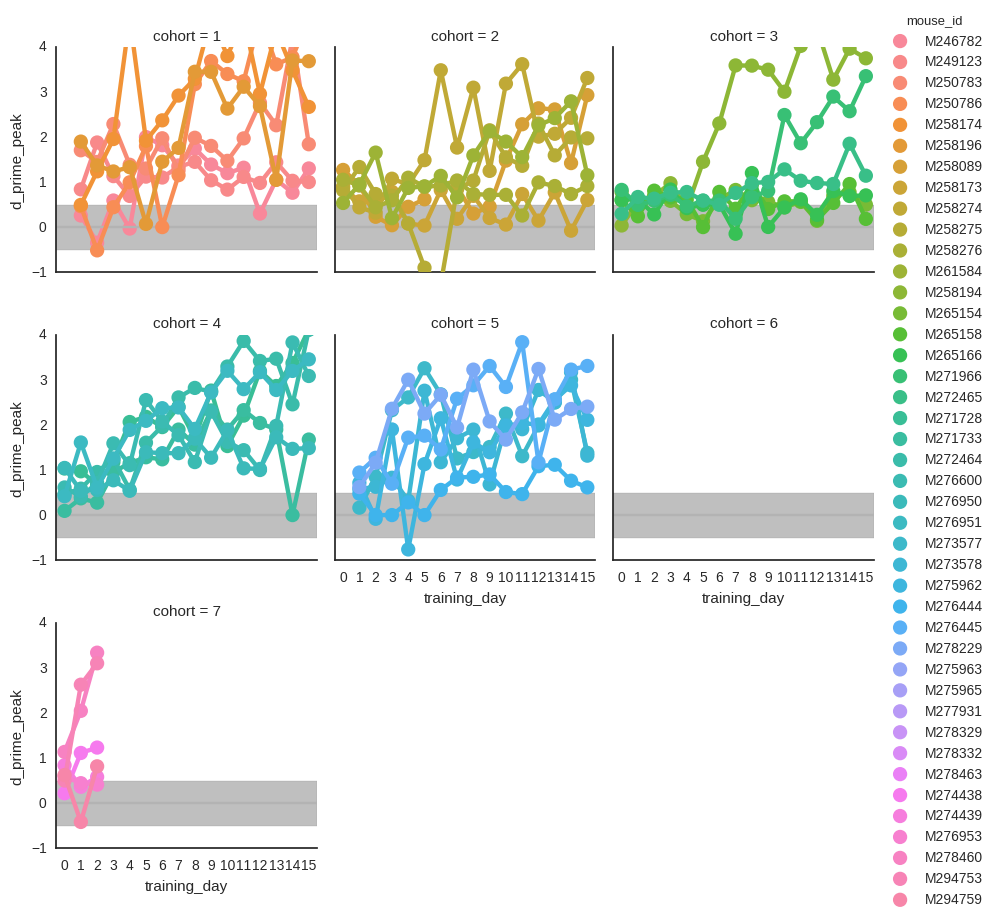

In [36]:
mask = (
#     (pdf.num_trials > num_tr_thresh) # ignore sessions with very few trials
#     & (pdf.training_day <= pdf.groupby('mouse_id')['training_day'].max().min())
    (pdf.training_day >= 0)
    & (pdf.training_day <= 15)
    )

fp = sns.factorplot('training_day','d_prime_peak',data=pdf[mask],
                    hue='mouse_id',
                    col_wrap=3,
                    size=3,
#                     aspect=2,
                    col='cohort',
#                     col_order=col_order,
              )

for ax in fp.axes.flatten():
    ax.axhline(0.0,color='0.7')
    ax.axhspan(-0.5,0.5,color='0.5',alpha=0.5,zorder=-10)
plt.ylim(-1,4)

plt.savefig('../figures/d_prime_by_training_day.pdf')

# fp = sns.factorplot('training_day','learned',data=pdf[mask],
#                     hue='mouse_id',
#                     col_wrap=3,
#                     size=3,
# #                     aspect=2,
#                     col='cohort',
# #                     col_order=col_order,
#                     legend=False,
#               )

# fp = sns.factorplot('training_day','learned',data=pdf[mask],
# #                     hue='mouse_id',
#                     col_wrap=3,
#                     size=3,
# #                     aspect=2,
#                     col='cohort',
# #                     col_order=col_order,
#                     legend=False,
#               )

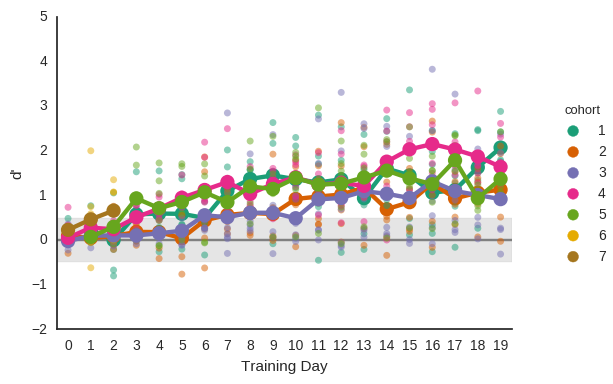

In [37]:
mask = (
#     (pdf.num_trials > num_tr_thresh) # ignore sessions with very few trials
#     & (pdf.training_day <= pdf.groupby('mouse_id')['training_day'].max().min())
    (pdf.training_day >= 0)
    & (pdf.training_day <= 19)
)

g = sns.factorplot('training_day','d_prime',data=pdf[mask],
                    size=4,
                    aspect=1.2,
                    hue='cohort',
                    kind='strip',  
                    legend=True,
                    alpha=0.5,
                    palette='Dark2'
              )

g.map_dataframe(sns.pointplot,'training_day','d_prime',
                hue='cohort',
                palette='Dark2',
                zorder=1000,
                ci=None,
                )
g.set_axis_labels('Training Day', 'd\'')
g.fig.get_children()[-1].set_bbox_to_anchor((1.15, 0.5, 0, 0))
# g.fig.get_children()[-1].set_title('')


for ax in g.axes.ravel():
    ax.axhline(0.0,color='0.5',zorder=-10)
    ax.axhspan(-0.5,0.5,color='0.5',alpha=0.2,zorder=-10)

plt.savefig('../figures/d_prime_by_training_day_cohort_means.pdf')

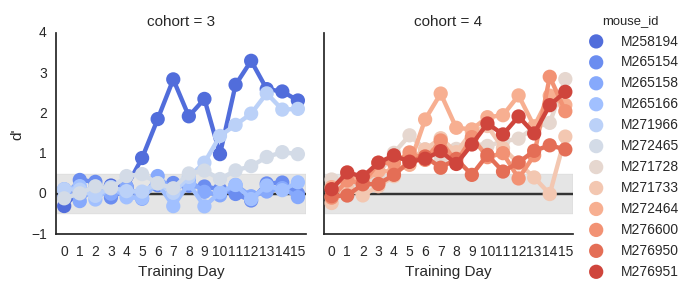

In [38]:
mask = (
#     (pdf.num_trials > num_tr_thresh) # ignore sessions with very few trials
#     & (pdf.training_day <= pdf.groupby('mouse_id')['training_day'].max().min())
    (pdf.training_day >= 0)
    & (pdf.training_day <= 15)
    & pdf.cohort.isin((3,4))
    )

fp = sns.factorplot('training_day','d_prime',data=pdf[mask],
                    hue='mouse_id',
#                     col_wrap=3,
                    size=3,
#                     aspect=2,
                    col='cohort',
                    palette='coolwarm',
#                     col_order=col_order,
              )

for ax in fp.axes.flatten():
    ax.axhline(0.0,color='0.2',zorder=-1)
    ax.axhspan(-0.5,0.5,color='0.5',alpha=0.2,zorder=-10)
plt.ylim(-1,4)
fp.set_axis_labels('Training Day','d\'')

plt.savefig('../figures/d_prime_by_training_day_cohorts3and4.pdf')

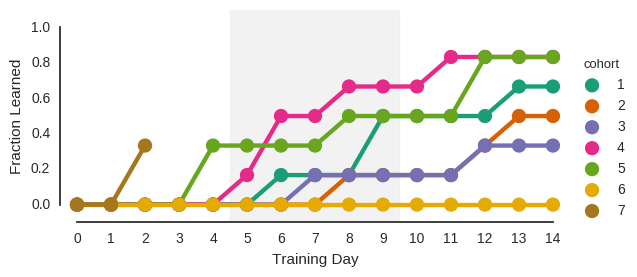

In [45]:
mask = (
#     (pdf.num_trials > num_tr_thresh) # ignore sessions with very few trials
#     & (pdf.training_day <= pdf.groupby('mouse_id')['training_day'].max().min())
    (pdf.training_day >= 0)
    & (pdf.training_day < 15)
)

g = sns.factorplot('training_day','learned',data=pdf[mask],
                   size=3,
                   aspect=2,
                   hue='cohort',
                   ci=False,  
                   legend=True,
                   palette='Dark2'
              )

g.set_axis_labels('Training Day','Fraction Learned')
plt.ylim(-0.1,1.1)
sns.despine(trim=True)

# g.map_dataframe(sns.pointplot,'training_day','d_prime',
#                 hue='cohort',
#                 palette='Dark2',
#                 zorder=1000,
#                 ci=None,
#                 )
# g.set_axis_labels('Training Day', 'd\'')
# g.fig.get_children()[-1].set_bbox_to_anchor((1.15, 0.5, 0, 0))
# # g.fig.get_children()[-1].set_title('')


for ax in g.axes.ravel():
#     ax.axhline(0.0,color='0.5',zorder=-10)
    ax.axvspan(4.5,9.5,color='0.5',alpha=0.1,zorder=-10)

plt.savefig('../figures/cohort_survival.pdf')

In [30]:
trials[trials.trial_type=='catch'][['trial_type','reward_volume']].head(30)

,trial_type,reward_volume
785,catch,0.006
814,catch,0.006
815,catch,0.006
817,catch,0.006
820,catch,0.006
826,catch,0.006
833,catch,0.006
839,catch,0.006
887,catch,0.006
890,catch,0.006


In [31]:
trials.columns

Index([                 u'LDT_mode',             u'auto_rewarded',
            u'blank_duration_range',      u'blank_screen_timeout',
                    u'change_color',           u'change_contrast',
                    u'change_frame',              u'change_image',
           u'change_image_category',         u'change_image_name',
                      u'change_ori',               u'change_size',
                     u'change_time',                     u'color',
                   u'computer_name',         u'cumulative_volume',
                            u'date',                       u'day',
                       u'dayofweek',                 u'delta_ori',
               u'distribution_mean',                  u'endframe',
                        u'filename',                  u'filepath',
                            u'hour',                     u'index',
                    u'inital_color',           u'inital_contrast',
           u'inital_image_category',         u'inital_image_na